#**PROYECTO FINAL DE SIMULACION DIGITAL**
#Analisis del trafico web de las paginas  mas visitas de Wikipedia
## Integrantes:
###Daniela Quintero Leon - 2161635
###Diana Sofía Torres Carreño - 2162116
###Luis Carlos Jimenez Arciniegas - 2161329
###Maria Camila Aparicio

In [94]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Instalacion e importacion de las herramientas de trabajo**

In [95]:
!pip install progress
import numpy as np 
import pandas as pd 
import progressbar, time
import matplotlib.pyplot as plt 
import re

#LECTURA Y ANALISIS DEL DATASET

In [0]:
# Load the data
train = pd.read_csv("/content/drive/My Drive/Proyecto-Simulacion/train_1.csv")

In [97]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,...,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,...,24.0,14.0,11.0,204.0,14.0,45.0,33.0,28.0,18.0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,60.0,22.0,15.0,17.0,19.0,18.0,21.0,21.0,47.0,65.0,17.0,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,...,14.0,15.0,15.0,11.0,20.0,13.0,19.0,621.0,57.0,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,17.0,17.0,13.0,9.0,18.0,22.0,17.0,15.0,22.0,23.0,19.0,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,...,9.0,3.0,5.0,4.0,0.0,1.0,4.0,5.0,8.0,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,9.0,8.0,3.0,210.0,5.0,4.0,6.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,...,7.0,10.0,7.0,10.0,14.0,17.0,11.0,9.0,11.0,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,17.0,8.0,9.0,18.0,12.0,12.0,18.0,13.0,18.0,23.0,10.0,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,13.0,15.0,14.0,16.0,9.0,178.0,64.0,12.0,10.0,11.0,6.0,8.0,7.0,9.0,8.0,5.0,11.0,8.0,4.0,15.0,5.0,8.0,8.0,6.0,7.0,15.0,4.0,11.0,7.0,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [5]:
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res[0][0:2]
    return 'na'

train['lang'] = train.Page.map(get_language)

from collections import Counter

print(Counter(train.lang))

Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'na': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


##Analisis de las paginas segun su lenguaje

In [0]:
lang_sets = {}
lang_sets['en'] = train[train.lang=='en'].iloc[:,0:-1]
lang_sets['ja'] = train[train.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = train[train.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = train[train.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = train[train.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = train[train.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = train[train.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = train[train.lang=='es'].iloc[:,0:-1]

sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]

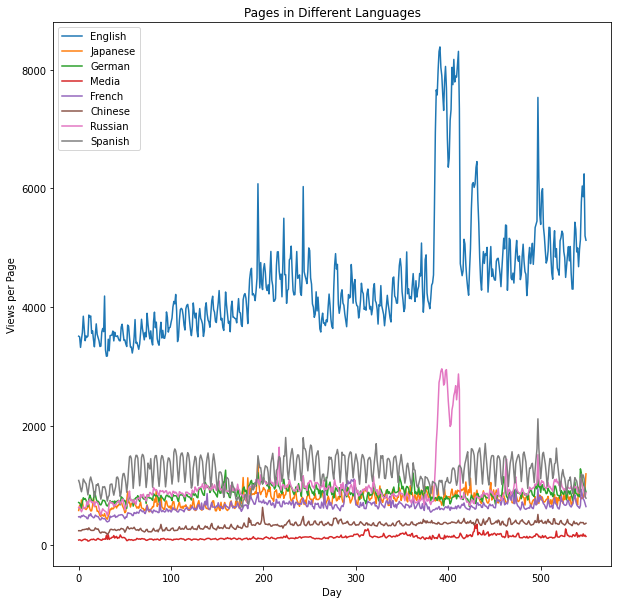

In [7]:
days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }

for key in sums:
    plt.plot(days,sums[key],label = labels[key] )
    
plt.legend()
plt.show()

##Paginas mas populares de cada lenguaje

In [8]:
# For each language get highest few pages
npages = 5
top_pages = {}
for key in lang_sets:
    print(key)
    sum_set = pd.DataFrame(lang_sets[key][['Page']])
    sum_set['total'] = lang_sets[key].sum(axis=1)
    sum_set = sum_set.sort_values('total',ascending=False)
    print(sum_set.head(10))
    top_pages[key] = sum_set.index[0]
    print('\n\n')

en
                                                    Page         total
38573   Main_Page_en.wikipedia.org_all-access_all-agents  1.206618e+10
9774       Main_Page_en.wikipedia.org_desktop_all-agents  8.774497e+09
74114   Main_Page_en.wikipedia.org_mobile-web_all-agents  3.153985e+09
39180  Special:Search_en.wikipedia.org_all-access_all...  1.304079e+09
10403  Special:Search_en.wikipedia.org_desktop_all-ag...  1.011848e+09
74690  Special:Search_en.wikipedia.org_mobile-web_all...  2.921628e+08
39172  Special:Book_en.wikipedia.org_all-access_all-a...  1.339931e+08
10399   Special:Book_en.wikipedia.org_desktop_all-agents  1.332859e+08
33644       Main_Page_en.wikipedia.org_all-access_spider  1.290204e+08
34257  Special:Search_en.wikipedia.org_all-access_spider  1.243102e+08



ja
                                                     Page        total
120336      メインページ_ja.wikipedia.org_all-access_all-agents  210753795.0
86431          メインページ_ja.wikipedia.org_desktop_all-agents  134147415

##Gafrica de cada una de las paginas mas populares en cada idioma

Page          Main_Page_en.wikipedia.org_all-access_all-agents
2015-07-01                                         2.03812e+07
2015-07-02                                         2.07522e+07
2015-07-03                                          1.9574e+07
2015-07-04                                         2.04396e+07
2015-07-05                                         2.07721e+07
2015-07-06                                         2.25447e+07
2015-07-07                                         2.12109e+07
2015-07-08                                         1.91079e+07
2015-07-09                                         1.99938e+07
Name: 38573, dtype: object
(551,)
550


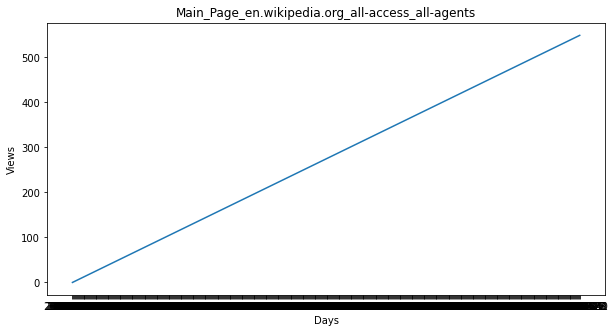

Page          メインページ_ja.wikipedia.org_all-access_all-agents
2015-07-01                                           418594
2015-07-02                                           415069
2015-07-03                                           419023
2015-07-04                                           398771
2015-07-05                                           394907
2015-07-06                                           434303
2015-07-07                                           428343
2015-07-08                                           420964
2015-07-09                                           424638
Name: 120336, dtype: object
(551,)
550


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12506 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12472 missing from current font.
  font.set_

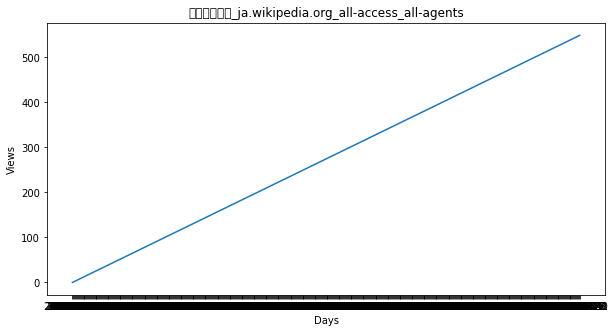

Page          Wikipedia:Hauptseite_de.wikipedia.org_all-acce...
2015-07-01                                          2.98362e+06
2015-07-02                                          2.96585e+06
2015-07-03                                           2.9007e+06
2015-07-04                                          2.68745e+06
2015-07-05                                          2.82741e+06
2015-07-06                                          3.06234e+06
2015-07-07                                           2.9992e+06
2015-07-08                                          2.99527e+06
2015-07-09                                          2.99581e+06
Name: 139119, dtype: object
(551,)
550


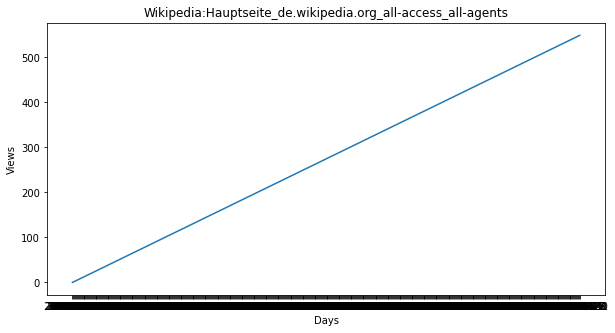

Page          Special:Search_commons.wikimedia.org_all-acces...
2015-07-01                                               113123
2015-07-02                                               117578
2015-07-03                                                97518
2015-07-04                                                75542
2015-07-05                                                78029
2015-07-06                                               115553
2015-07-07                                               121467
2015-07-08                                               121423
2015-07-09                                               113629
Name: 45071, dtype: object
(551,)
550


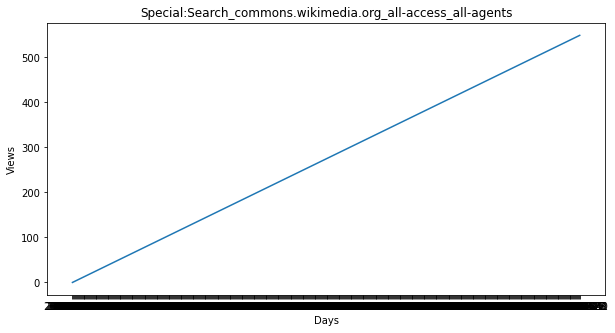

Page          Wikipédia:Accueil_principal_fr.wikipedia.org_a...
2015-07-01                                          1.62042e+06
2015-07-02                                          1.62185e+06
2015-07-03                                          1.59063e+06
2015-07-04                                          1.80825e+06
2015-07-05                                          1.54626e+06
2015-07-06                                          1.61161e+06
2015-07-07                                          1.58249e+06
2015-07-08                                          1.58238e+06
2015-07-09                                          1.56337e+06
Name: 27330, dtype: object
(551,)
550


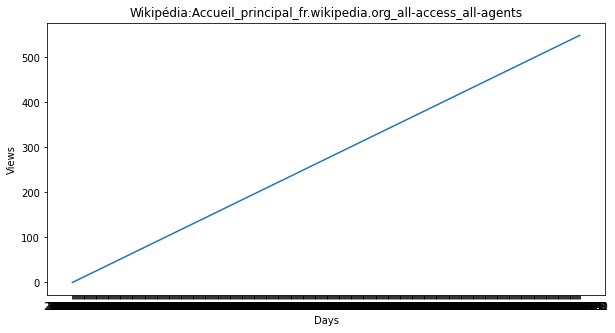

Page          Wikipedia:首页_zh.wikipedia.org_all-access_all-a...
2015-07-01                                               220658
2015-07-02                                               224568
2015-07-03                                               216749
2015-07-04                                               204914
2015-07-05                                               208939
2015-07-06                                               244429
2015-07-07                                               222053
2015-07-08                                               236753
2015-07-09                                               223323
Name: 28727, dtype: object
(551,)
550


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39318 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 39318 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 39029 missing from current font.
  font.set_text(s, 0, flags=flags)


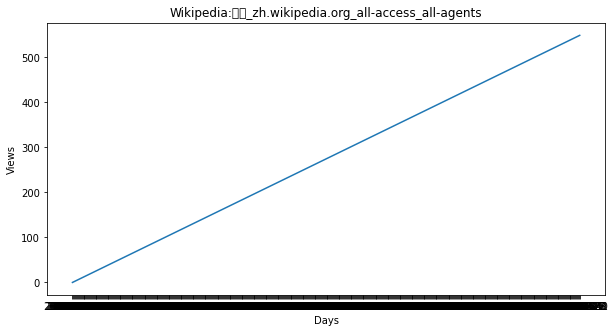

Page          Заглавная_страница_ru.wikipedia.org_all-access...
2015-07-01                                           1.4533e+06
2015-07-02                                          1.57137e+06
2015-07-03                                          1.27475e+06
2015-07-04                                          1.12384e+06
2015-07-05                                          1.16878e+06
2015-07-06                                          1.28632e+06
2015-07-07                                          1.27848e+06
2015-07-08                                          1.30196e+06
2015-07-09                                           1.3267e+06
Name: 99322, dtype: object
(551,)
550


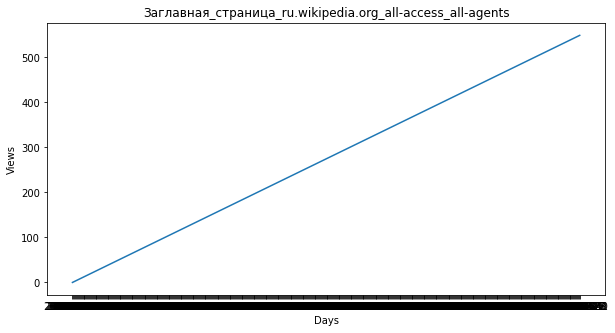

Page          Wikipedia:Portada_es.wikipedia.org_all-access_...
2015-07-01                                          1.76461e+06
2015-07-02                                          1.75773e+06
2015-07-03                                          1.70024e+06
2015-07-04                                           1.6602e+06
2015-07-05                                          1.65518e+06
2015-07-06                                          1.75857e+06
2015-07-07                                          1.74611e+06
2015-07-08                                          1.72871e+06
2015-07-09                                          1.73015e+06
Name: 92205, dtype: object
(551,)
550


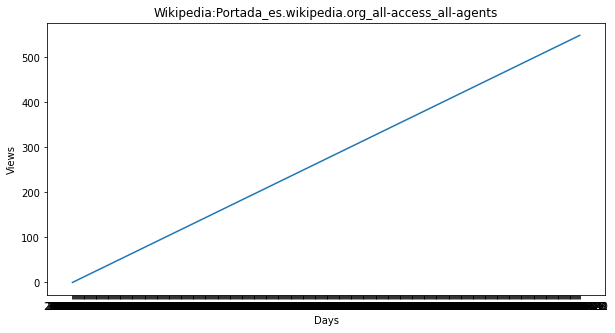

In [9]:
for key in top_pages:
    fig = plt.figure(1,figsize=(10,5))
    cols = train.columns
    cols = cols[1:-1]
    data = train.loc[top_pages[key],cols]
    head = train.loc[top_pages[key]]
    print(train.loc[top_pages[key]].head(10))
    print(head[1:].shape)
    print(len(days))
    plt.plot(head[1:-1].index,days)
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.title(train.loc[top_pages[key],'Page'])
    plt.show()


#TEST DE ESTACIONARIDAD A LAS SERIES DE TIEMPO

In [0]:
from statsmodels.tsa.stattools import adfuller #se importa la prueba estadistica

def test_stationarity(timeseries):
    
    #Determing rolling statistics hace un ventaneo y calcula la media 
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    ## Prueba de Dickey-fuller: esta es una de las pruebas estadísticas para verificar la estacionariedad. 
    #Primero consideramos la hipótesis nula: la serie temporal no es estacionaria. 
    #El resultado del resto contendrá la estadística de prueba y el valor crítico para diferentes niveles de 
    #confianza. La idea es tener estadísticas de prueba inferiores al valor crítico, en este caso podemos rechazar 
    #la hipótesis nula y decir que esta serie de tiempo es estacionaria
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Main_Page_en.wikipedia.org_all-access_all-agents


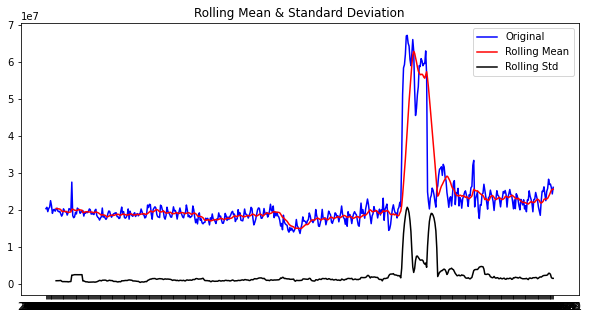

Results of Dickey-Fuller Test:
Test Statistic                  -2.990145
p-value                          0.035825
#Lags Used                      15.000000
Number of Observations Used    534.000000
Critical Value (1%)             -3.442655
Critical Value (5%)             -2.866968
Critical Value (10%)            -2.569661
dtype: float64



メインページ_ja.wikipedia.org_all-access_all-agents


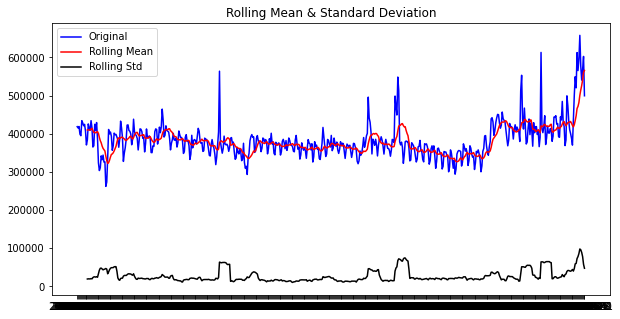

Results of Dickey-Fuller Test:
Test Statistic                  -1.429105
p-value                          0.568246
#Lags Used                      14.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.442632
Critical Value (5%)             -2.866957
Critical Value (10%)            -2.569655
dtype: float64



Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents


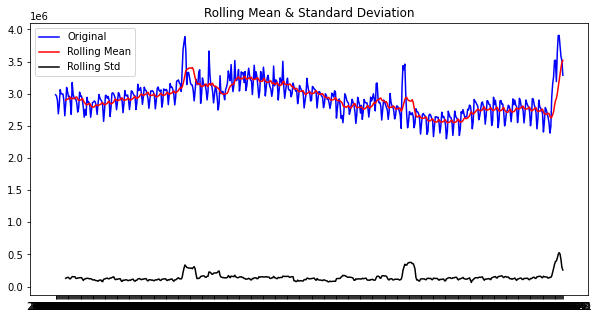

Results of Dickey-Fuller Test:
Test Statistic                  -1.520025
p-value                          0.523583
#Lags Used                      19.000000
Number of Observations Used    530.000000
Critical Value (1%)             -3.442749
Critical Value (5%)             -2.867009
Critical Value (10%)            -2.569683
dtype: float64



Special:Search_commons.wikimedia.org_all-access_all-agents


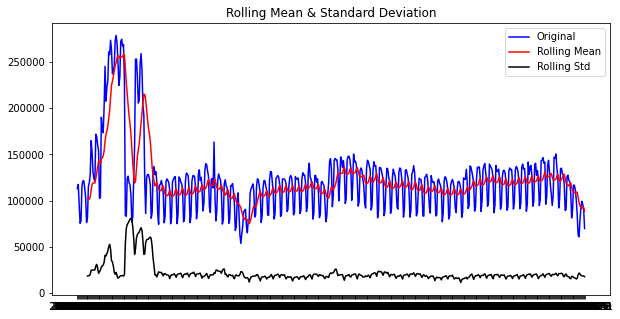

Results of Dickey-Fuller Test:
Test Statistic                  -2.971810
p-value                          0.037612
#Lags Used                      15.000000
Number of Observations Used    534.000000
Critical Value (1%)             -3.442655
Critical Value (5%)             -2.866968
Critical Value (10%)            -2.569661
dtype: float64



Wikipédia:Accueil_principal_fr.wikipedia.org_all-access_all-agents


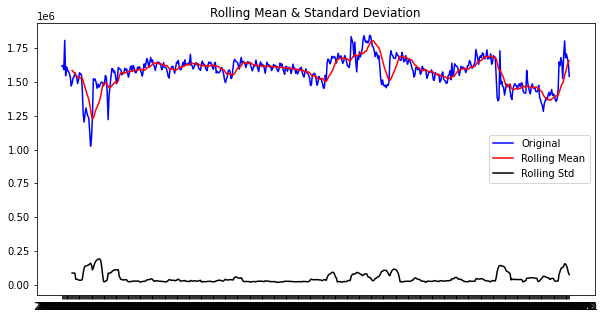

Results of Dickey-Fuller Test:
Test Statistic                  -3.556861
p-value                          0.006641
#Lags Used                      14.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.442632
Critical Value (5%)             -2.866957
Critical Value (10%)            -2.569655
dtype: float64



Wikipedia:首页_zh.wikipedia.org_all-access_all-agents


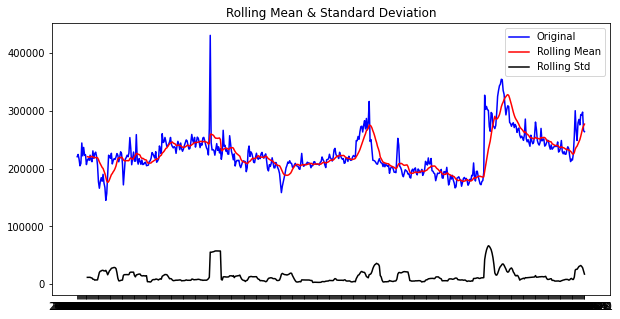

Results of Dickey-Fuller Test:
Test Statistic                  -2.657357
p-value                          0.081712
#Lags Used                      14.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.442632
Critical Value (5%)             -2.866957
Critical Value (10%)            -2.569655
dtype: float64



Заглавная_страница_ru.wikipedia.org_all-access_all-agents


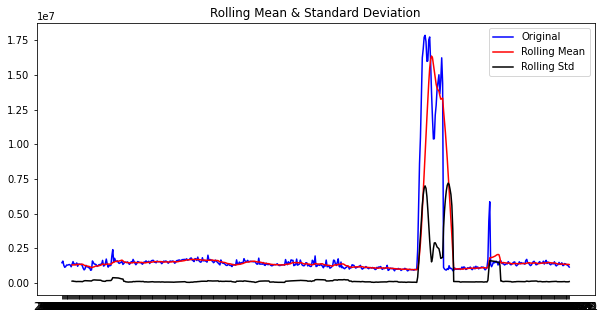

Results of Dickey-Fuller Test:
Test Statistic                  -4.128016
p-value                          0.000870
#Lags Used                       4.000000
Number of Observations Used    545.000000
Critical Value (1%)             -3.442406
Critical Value (5%)             -2.866858
Critical Value (10%)            -2.569602
dtype: float64



Wikipedia:Portada_es.wikipedia.org_all-access_all-agents


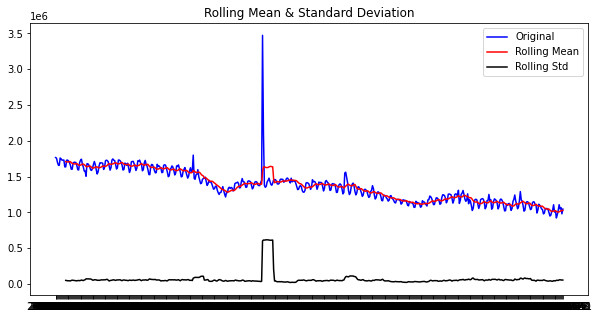

Results of Dickey-Fuller Test:
Test Statistic                  -1.060839
p-value                          0.730434
#Lags Used                      13.000000
Number of Observations Used    536.000000
Critical Value (1%)             -3.442609
Critical Value (5%)             -2.866947
Critical Value (10%)            -2.569650
dtype: float64





In [11]:
for key in top_pages:
    fig = plt.figure(1,figsize=(10,5))
    cols = train.columns
    cols = cols[1:-1]
    data = train.loc[top_pages[key],cols]
    head = train.loc[top_pages[key]]
    print(head[0])
    test_stationarity(head[1:-1])
    print('\n\n')

## ANALISIS DE LOS TEST DE ESTACIONARIDAD
*Despues de aplicar a cada una de las series que vamos a estudiar la funcion para determinar si las series son estacionarias o no y basandonos en la teoria de que para que una serie **estacionaria** el Pvalue debe ser MENOR al valor critico escogido (para nuestro caso 0.05)*

Segun lo anterior dicho determinamos que:

**1**.Main_Page_en.wikipedia es **ESTACIONARIA**

---


**2**.メインページ_ja.wikipedia es **NO ESTACIONARIA**

---


**3**.Wikipedia:Hauptseite_de es **NO ESTACIONARIA**

---


**4**.Special:Search_commons es **ESTACIONARIA**

---


**5**.Wikipédia:Accueil_principal_fr. es **ESTACIONARIA**

---


**6**.Wikipedia:首页_zh.wikipedia es **NO ESTACIONARIA**

---


**7**.Заглавная_страница_ru es **ESTACIONARIA**

---


**8**.Wikipedia:Portada_es.wikipedia es **NO ESTACIONARIA**

## FUNCIONES LOGARITIMICAS DE CADA SERIE DE TIEMPO APLICANDO SHIFT PARA VOLVER A VERIFICAR LA ESTACIONARIDAD.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import datetime

**Se hace la resta entre las la serie logaritmica y la serie con shift y se grafica**

Main_Page_en.wikipedia.org_all-access_all-agents


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


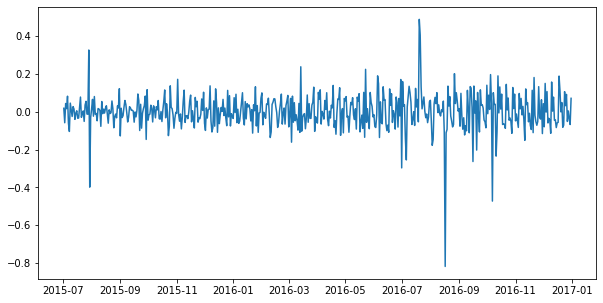




メインページ_ja.wikipedia.org_all-access_all-agents


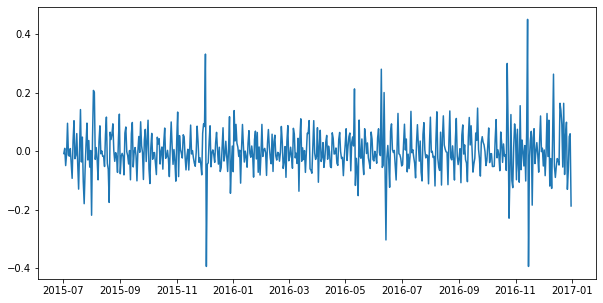




Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents


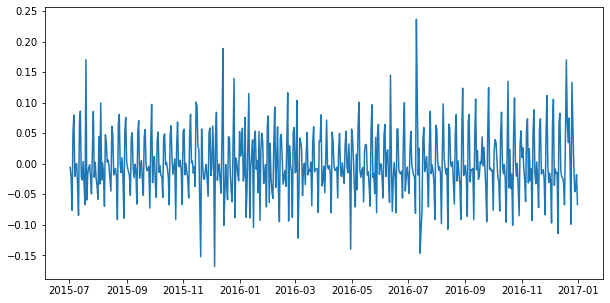




Special:Search_commons.wikimedia.org_all-access_all-agents


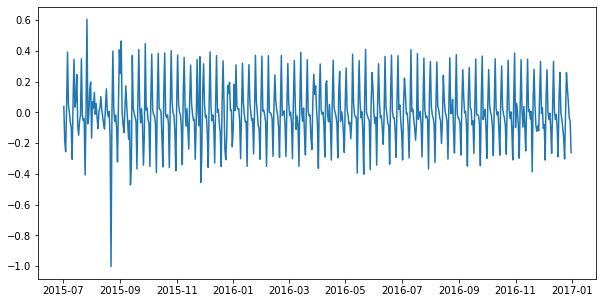




Wikipédia:Accueil_principal_fr.wikipedia.org_all-access_all-agents


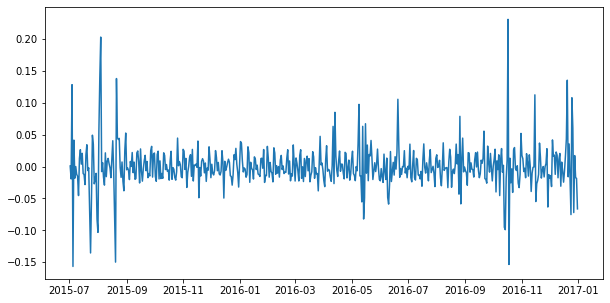




Wikipedia:首页_zh.wikipedia.org_all-access_all-agents


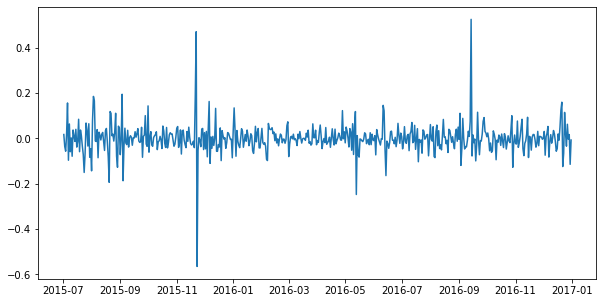




Заглавная_страница_ru.wikipedia.org_all-access_all-agents


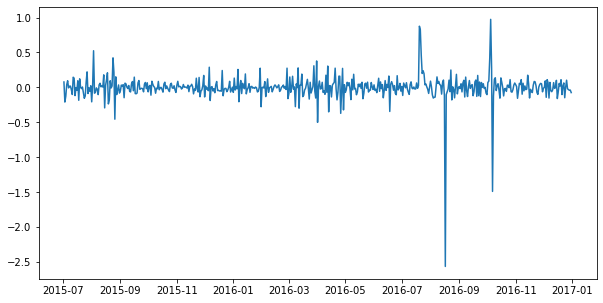




Wikipedia:Portada_es.wikipedia.org_all-access_all-agents


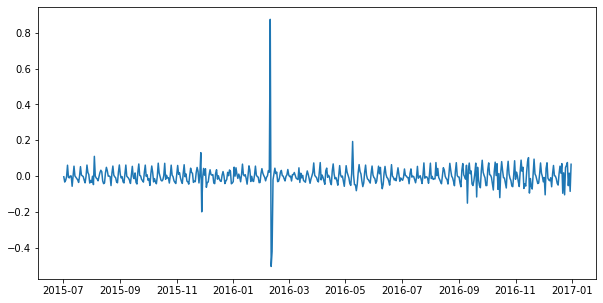

In [13]:

for key in top_pages:
    fig = plt.figure(1,figsize=(10,5))
    cols = train.columns
    cols = cols[1:-1]
    data = train.loc[top_pages[key],cols]
    head = train.loc[top_pages[key]]
    print(head[0])
    array=np.column_stack((np.array(train.columns[1:]),np.array(train[train["Page"]==head[0]].iloc[0,1:])))
    main=pd.DataFrame(array)
    main.columns=['day','visitas']
    main = main[:-1]
    main['visitas']=np.float64(main['visitas'])
    from datetime import datetime
    #con = data['Month']
    main['day'] = pd.to_datetime(main['day'])
    main.set_index('day', inplace=True)
    #check datatype of index
    main.index
    serie = main['visitas']
    Dat1_log = np.log(serie)
    Dat1_log_diff_shifting = Dat1_log - Dat1_log.shift()
    plt.plot(Dat1_log_diff_shifting)
    plt.show()
    print('\n\n')

##Aplicando de nuevo el test de estacionaridad

Main_Page_en.wikipedia.org_all-access_all-agents


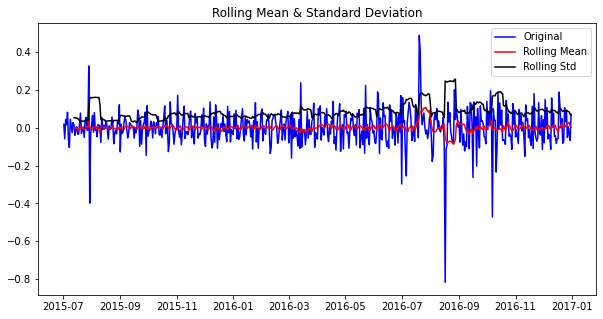

Results of Dickey-Fuller Test:
Test Statistic                -6.438455e+00
p-value                        1.630531e-08
#Lags Used                     1.400000e+01
Number of Observations Used    5.340000e+02
Critical Value (1%)           -3.442655e+00
Critical Value (5%)           -2.866968e+00
Critical Value (10%)          -2.569661e+00
dtype: float64



メインページ_ja.wikipedia.org_all-access_all-agents


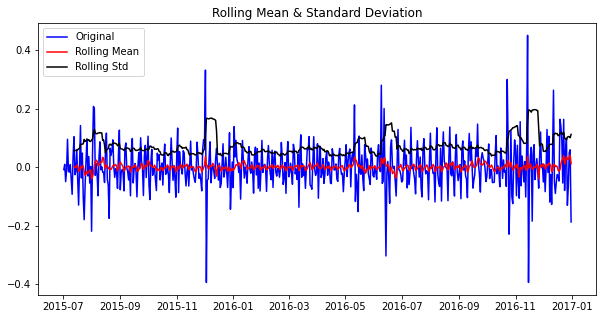

Results of Dickey-Fuller Test:
Test Statistic                -8.344263e+00
p-value                        3.116018e-13
#Lags Used                     1.900000e+01
Number of Observations Used    5.290000e+02
Critical Value (1%)           -3.442772e+00
Critical Value (5%)           -2.867019e+00
Critical Value (10%)          -2.569688e+00
dtype: float64



Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents


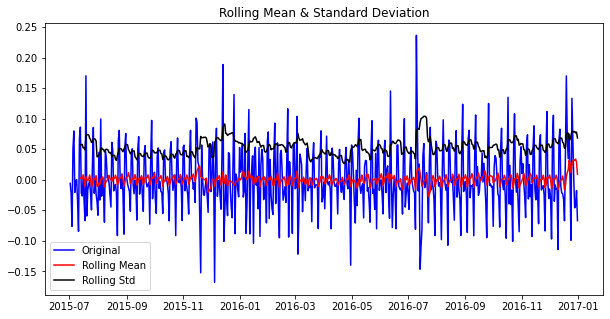

Results of Dickey-Fuller Test:
Test Statistic                -7.045289e+00
p-value                        5.707684e-10
#Lags Used                     1.900000e+01
Number of Observations Used    5.290000e+02
Critical Value (1%)           -3.442772e+00
Critical Value (5%)           -2.867019e+00
Critical Value (10%)          -2.569688e+00
dtype: float64



Special:Search_commons.wikimedia.org_all-access_all-agents


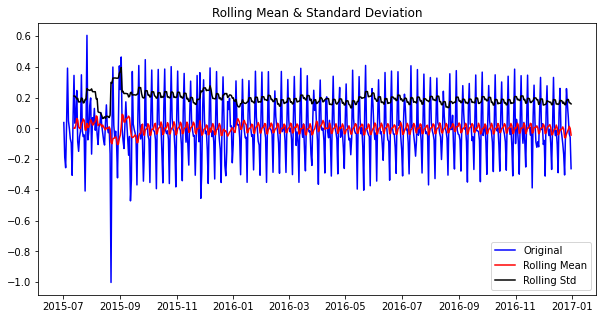

Results of Dickey-Fuller Test:
Test Statistic                -8.508456e+00
p-value                        1.185200e-13
#Lags Used                     1.300000e+01
Number of Observations Used    5.350000e+02
Critical Value (1%)           -3.442632e+00
Critical Value (5%)           -2.866957e+00
Critical Value (10%)          -2.569655e+00
dtype: float64



Wikipédia:Accueil_principal_fr.wikipedia.org_all-access_all-agents


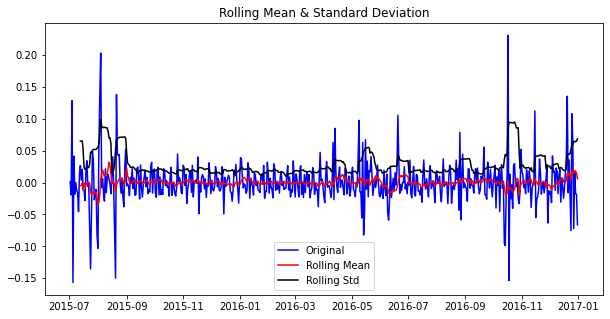

Results of Dickey-Fuller Test:
Test Statistic                -7.614833e+00
p-value                        2.205904e-11
#Lags Used                     1.500000e+01
Number of Observations Used    5.330000e+02
Critical Value (1%)           -3.442678e+00
Critical Value (5%)           -2.866978e+00
Critical Value (10%)          -2.569666e+00
dtype: float64



Wikipedia:首页_zh.wikipedia.org_all-access_all-agents


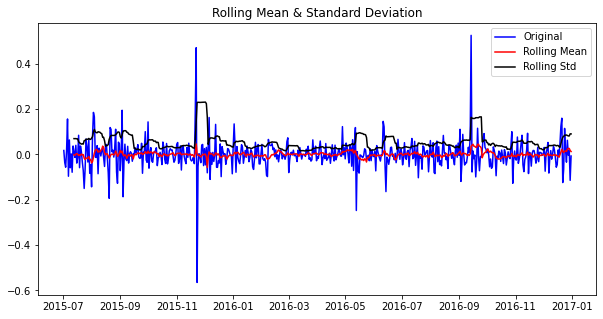

Results of Dickey-Fuller Test:
Test Statistic                -7.108932e+00
p-value                        3.985703e-10
#Lags Used                     1.300000e+01
Number of Observations Used    5.350000e+02
Critical Value (1%)           -3.442632e+00
Critical Value (5%)           -2.866957e+00
Critical Value (10%)          -2.569655e+00
dtype: float64



Заглавная_страница_ru.wikipedia.org_all-access_all-agents


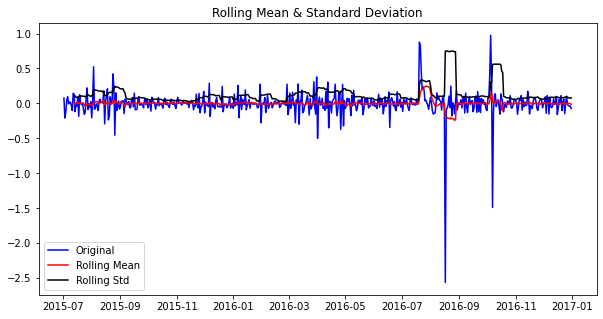

Results of Dickey-Fuller Test:
Test Statistic                -1.784165e+01
p-value                        3.104454e-30
#Lags Used                     1.000000e+00
Number of Observations Used    5.470000e+02
Critical Value (1%)           -3.442361e+00
Critical Value (5%)           -2.866838e+00
Critical Value (10%)          -2.569592e+00
dtype: float64



Wikipedia:Portada_es.wikipedia.org_all-access_all-agents


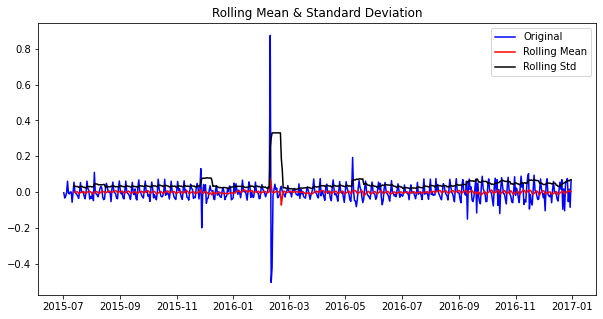

Results of Dickey-Fuller Test:
Test Statistic                -1.056168e+01
p-value                        7.699372e-19
#Lags Used                     1.200000e+01
Number of Observations Used    5.360000e+02
Critical Value (1%)           -3.442609e+00
Critical Value (5%)           -2.866947e+00
Critical Value (10%)          -2.569650e+00
dtype: float64





In [14]:

for key in top_pages:
    fig = plt.figure(1,figsize=(10,5))
    cols = train.columns
    cols = cols[1:-1]
    data = train.loc[top_pages[key],cols]
    head = train.loc[top_pages[key]]
    print(head[0])
    array=np.column_stack((np.array(train.columns[1:]),np.array(train[train["Page"]==head[0]].iloc[0,1:])))
    main=pd.DataFrame(array)
    main.columns=['day','visitas']
    main = main[:-1]
    main['visitas']=np.float64(main['visitas'])
    from datetime import datetime
    #con = data['Month']
    main['day'] = pd.to_datetime(main['day'])
    main.set_index('day', inplace=True)
    #check datatype of index
    main.index
    serie = main['visitas']
    Dat1_log = np.log(serie)
    Dat1_log_diff_shifting = Dat1_log - Dat1_log.shift()
    Dat1_log_diff_shifting.dropna(inplace=True)
    test_stationarity(Dat1_log_diff_shifting)
    print('\n\n')

###ANALISIS DESPUES DE APLICAR EL TEST DE ESTACIONARIDAD

Se vuelven a analizar el Pvalue y el valor critico(0.05) de cada una de las series y se concluye que las 8 series son **ESTACIONARIAs** 

#ARIMA

**SE APLICAN LAS FUNCIONES PARA DETERMINAR LOS VALORES DE P Y Q**

Main_Page_en.wikipedia.org_all-access_all-agents
Valor de y:  0.0836507615561587 

Valor de ACF: [ 1.         -0.03742164  0.00213201 -0.19162041 -0.10038593 -0.01522872
 -0.07042846  0.29702375 -0.0011338  -0.0035211  -0.1807796  -0.13907123
  0.01486002 -0.00947592  0.28647399 -0.06961704 -0.00594672 -0.13576373
 -0.10412009  0.04414004 -0.0223624 ] 

Valor de PACF: [ 1.00000000e+00 -3.74619072e-02  7.79462747e-04 -1.92211756e-01
 -1.19318318e-01 -2.81353810e-02 -1.17596013e-01  2.61133469e-01
  3.53607467e-03 -4.06802801e-02 -1.06923498e-01 -1.26650897e-01
  1.00234273e-03 -1.67646074e-02  1.80934965e-01 -8.77072326e-02
 -4.71537204e-02 -2.68567158e-02 -6.71139977e-02  3.55207561e-02
 -3.07715167e-02] 



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


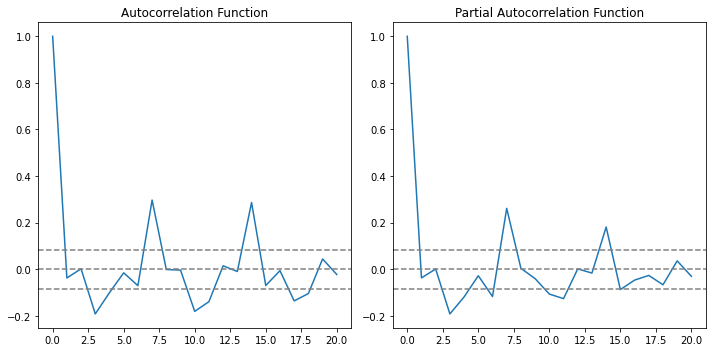




メインページ_ja.wikipedia.org_all-access_all-agents
Valor de y:  0.0836507615561587 

Valor de ACF: [ 1.00000000e+00 -8.74596348e-02 -2.82882345e-01 -1.68444574e-02
 -6.55220503e-02 -1.98738947e-01  5.71199542e-04  3.73965300e-01
  6.08946991e-02 -2.04461956e-01 -5.24881882e-02 -3.57424902e-02
 -2.00530941e-01  3.99533056e-02  3.85660714e-01  2.80211777e-03
 -1.87470690e-01 -5.27408565e-02  2.75268814e-02 -1.71783088e-01
 -5.40570202e-02] 

Valor de PACF: [ 1.         -0.08842084 -0.29595571 -0.08232963 -0.18044428 -0.30657228
 -0.20810969  0.20392482  0.0843992  -0.07504736 -0.07477136 -0.08266853
 -0.20354959 -0.09166967  0.18484017 -0.01929321 -0.06413015 -0.09368146
  0.02718897 -0.09579076 -0.17798497] 



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


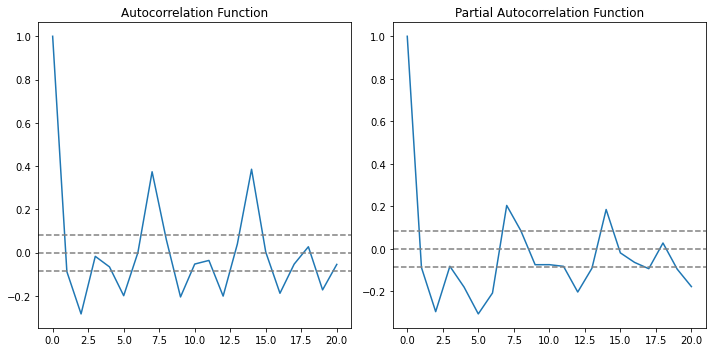




Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents
Valor de y:  0.0836507615561587 

Valor de ACF: [ 1.         -0.01224423 -0.35275025 -0.05090235 -0.06434919 -0.32465412
  0.05152332  0.60626431  0.07377781 -0.33311676 -0.07895358 -0.07494216
 -0.26063546  0.0448834   0.57683951  0.06179387 -0.24496368 -0.09641576
 -0.07398721 -0.26776946  0.03397316] 

Valor de PACF: [ 1.         -0.0122806  -0.35408416 -0.07150795 -0.22461182 -0.46858469
 -0.2233952   0.38381542  0.13685741 -0.10283055 -0.10571508 -0.133641
 -0.13839276 -0.15181112  0.22192903  0.00487941  0.08636462 -0.03245827
 -0.03249358 -0.15456322 -0.16219261] 



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


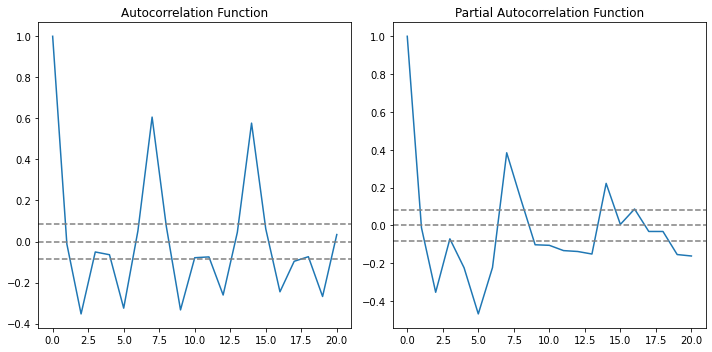




Special:Search_commons.wikimedia.org_all-access_all-agents
Valor de y:  0.0836507615561587 

Valor de ACF: [ 1.          0.15802353 -0.40599486 -0.18334833 -0.1879906  -0.38208109
  0.17581786  0.79407118  0.15766666 -0.37608034 -0.20654144 -0.21377038
 -0.36573657  0.15249931  0.77812668  0.16263012 -0.35893057 -0.18889659
 -0.18080864 -0.34853392  0.16283915] 

Valor de PACF: [ 1.          0.15857134 -0.44361355 -0.02753794 -0.41316845 -0.56574821
 -0.06374694  0.55299675  0.05686563 -0.03967302 -0.14411513 -0.18063485
 -0.24489361 -0.25993189  0.24747009 -0.01679065  0.02609072  0.01265224
  0.04478    -0.07819174 -0.09935668] 



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


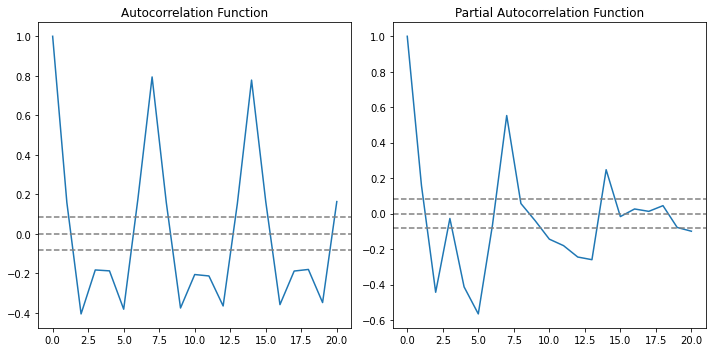




Wikipédia:Accueil_principal_fr.wikipedia.org_all-access_all-agents
Valor de y:  0.0836507615561587 

Valor de ACF: [ 1.         -0.0253055  -0.09233925 -0.16932391 -0.10960058 -0.0691843
  0.0244175   0.19867749  0.08224499 -0.0546248  -0.09189174 -0.16199746
 -0.07969703  0.01410676  0.2097985   0.01751017 -0.09139879 -0.08468783
 -0.02060643  0.02000291  0.02021688] 

Valor de PACF: [ 1.         -0.02548751 -0.09383267 -0.17737188 -0.13189127 -0.12284107
 -0.04771659  0.148121    0.05913145 -0.03302123 -0.0288147  -0.13379115
 -0.09623446 -0.04647346  0.11868119 -0.05945124 -0.11038771 -0.06088292
  0.01435987  0.04293818 -0.00450019] 



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


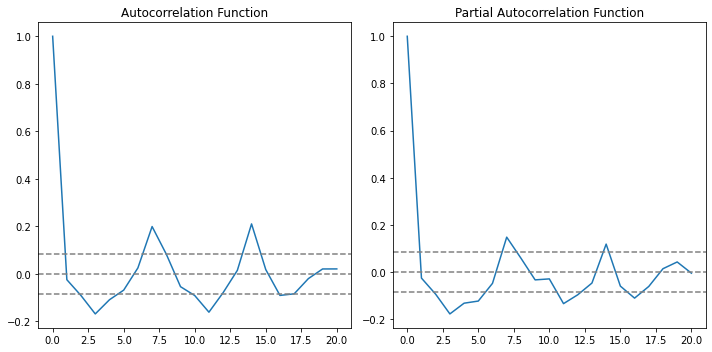




Wikipedia:首页_zh.wikipedia.org_all-access_all-agents
Valor de y:  0.0836507615561587 

Valor de ACF: [ 1.         -0.10682012 -0.20287155  0.00537505 -0.0252762  -0.10442189
 -0.03798525  0.14049057  0.0344254  -0.04385478 -0.07918149 -0.03809105
  0.00612087 -0.04838965  0.15353189  0.00760688 -0.02942153 -0.00213264
 -0.02808394 -0.00300257 -0.0162178 ] 

Valor de PACF: [ 1.         -0.10682237 -0.21805888 -0.04732867 -0.08030255 -0.13596469
 -0.1038145   0.07160371  0.02849335 -0.00382131 -0.09325307 -0.07453977
 -0.02722748 -0.07557005  0.12015583 -0.01274113  0.01159124  0.00911096
 -0.01147462  0.01757194 -0.01049266] 



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


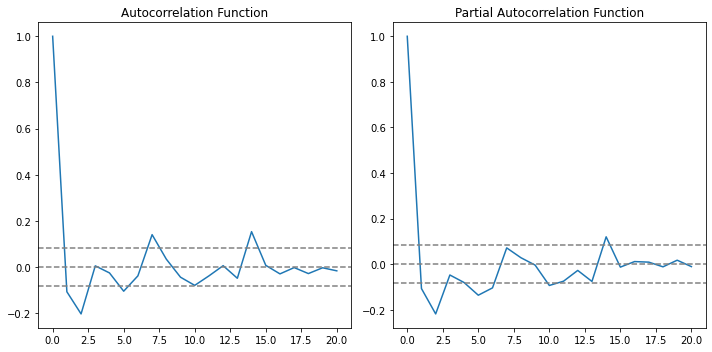




Заглавная_страница_ru.wikipedia.org_all-access_all-agents
Valor de y:  0.0836507615561587 

Valor de ACF: [ 1.00000000e+00  4.28387858e-02 -9.78528867e-02 -2.55058481e-02
  2.30879390e-04 -2.23258409e-02 -1.89631944e-02  7.67385841e-02
  1.77390810e-02 -6.55035676e-02 -1.26157674e-03 -5.19933882e-03
 -2.31675001e-02  3.48652029e-02  4.62002785e-02  1.06977135e-02
 -5.68369462e-02 -1.19797491e-02  4.27990800e-03 -5.75623607e-02
  2.05351335e-02] 

Valor de PACF: [ 1.          0.0428524  -0.09994425 -0.01689963 -0.00762928 -0.02640919
 -0.01821964  0.0745672   0.00638859 -0.05419079  0.00941514 -0.01671931
 -0.02213045  0.03920701  0.0320971   0.00860477 -0.04196333 -0.00445083
 -0.00491495 -0.05636081  0.02240573] 



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


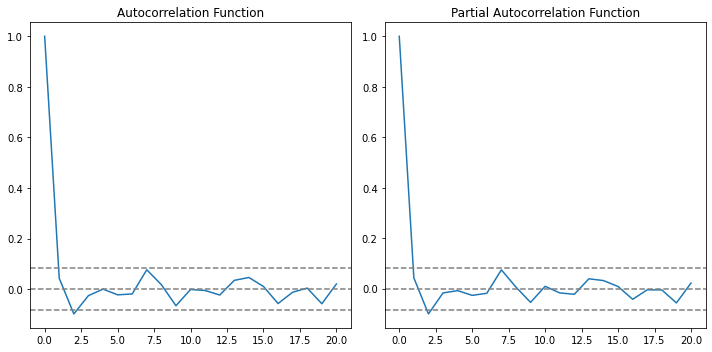




Wikipedia:Portada_es.wikipedia.org_all-access_all-agents
Valor de y:  0.0836507615561587 

Valor de ACF: [ 1.         -0.05818141 -0.26094302 -0.1802904  -0.14628007 -0.08925563
  0.11393526  0.2835969   0.09932111 -0.09371886 -0.1515717  -0.16481082
 -0.08183406  0.11219211  0.26594894  0.09214281 -0.0750418  -0.1426629
 -0.17012585 -0.06901267  0.10177753] 

Valor de PACF: [ 1.         -0.0583093  -0.2665124  -0.23253823 -0.29645536 -0.34233562
 -0.23639999  0.00215366  0.03510688  0.02906736  0.00465716 -0.0856247
 -0.1566234  -0.12720834  0.02658323  0.02357366  0.03515848  0.02226482
 -0.04798214 -0.08445981 -0.09095089] 



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


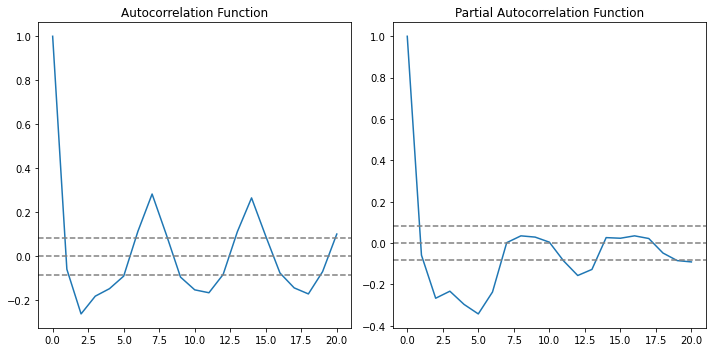

In [15]:

for key in top_pages:
    fig = plt.figure(1,figsize=(10,5))
    cols = train.columns
    cols = cols[1:-1]
    data = train.loc[top_pages[key],cols]
    head = train.loc[top_pages[key]]
    print(head[0])
    array=np.column_stack((np.array(train.columns[1:]),np.array(train[train["Page"]==head[0]].iloc[0,1:])))
    main=pd.DataFrame(array)
    main.columns=['day','visitas']
    main = main[:-1]
    main['visitas']=np.float64(main['visitas'])
    from datetime import datetime
    #con = data['Month']
    main['day'] = pd.to_datetime(main['day'])
    main.set_index('day', inplace=True)
    #check datatype of index
    main.index
    serie = main['visitas']
    Dat1_log = np.log(serie)
    Dat1_log_diff_shifting = Dat1_log - Dat1_log.shift()
    Dat1_log_diff_shifting.dropna(inplace=True)
    
    #ACF & PACF plots

    lag_acf = acf(Dat1_log_diff_shifting, nlags=20)
    lag_pacf = pacf(Dat1_log_diff_shifting, nlags=20, method='ols')

    #Plot ACF:
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(Dat1_log_diff_shifting)), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(Dat1_log_diff_shifting)), linestyle='--', color='gray')
    plt.title('Autocorrelation Function')            

    #Plot PACF
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(Dat1_log_diff_shifting)), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(Dat1_log_diff_shifting)), linestyle='--', color='gray')
    plt.title('Partial Autocorrelation Function')
    y=1.96/np.sqrt(len(Dat1_log_diff_shifting))
    print( 'Valor de y: ',y , '\n') 
    print( 'Valor de ACF:', lag_acf , '\n')
    print( 'Valor de PACF:', lag_pacf , '\n')     
    plt.tight_layout()   
    plt.show()
    
    print('\n\n')

###Se concluye que los valores de p y q para cada una de las series son:

**1**.Main_Page_en.wikipedia  **P:** y  **Q:** = 2,2

---


**2**.メインページ_ja.wikipedia   **P:** y  **Q:** = 2,2

---


**3**.Wikipedia:Hauptseite_de  **P:** y  **Q:** = 2,2

---


**4**.Special:Search_commons  **P:** y  **Q:** = 4,4

---


**5**.Wikipédia:Accueil_principal_fr.  **P:** y  **Q:** = 4,4

---


**6**.Wikipedia:首页_zh.wikipedia  **P:** y  **Q:** = 2,1

---


**7**.Заглавная_страница_ru  **P:** y  **Q:** = 2,2

---


**8**.Wikipedia:Portada_es.wikipedia  **P:** y  **Q:** = 2,2

Main_Page_en.wikipedia.org_all-access_all-agents


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Plotting AR model


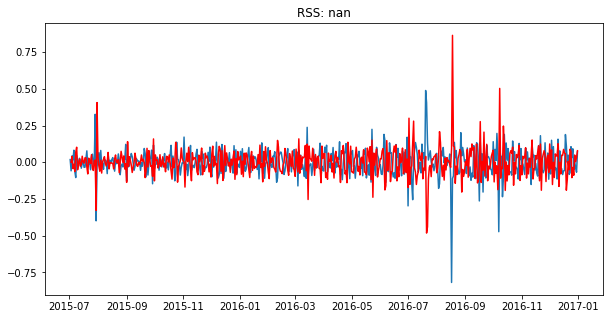




メインページ_ja.wikipedia.org_all-access_all-agents


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


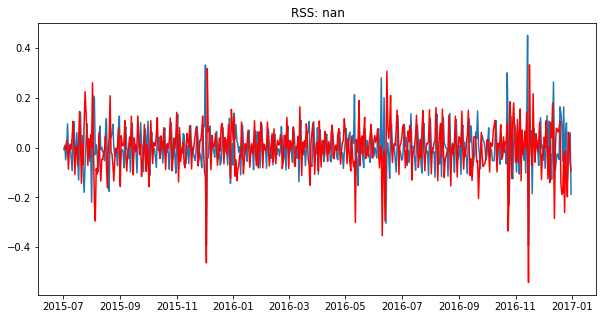




Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Plotting AR model


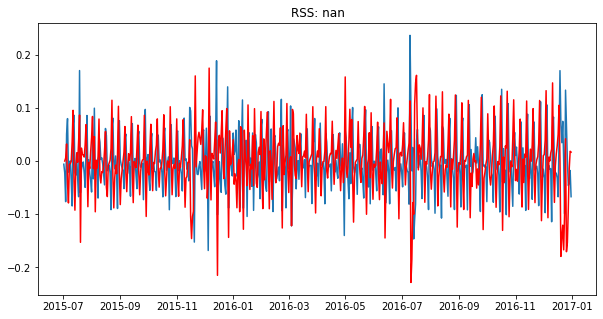




Special:Search_commons.wikimedia.org_all-access_all-agents


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669

Plotting AR model


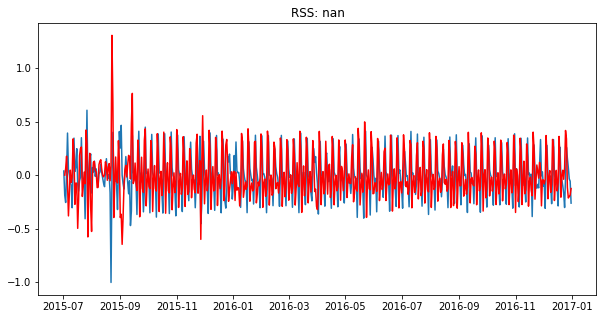




Wikipédia:Accueil_principal_fr.wikipedia.org_all-access_all-agents


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


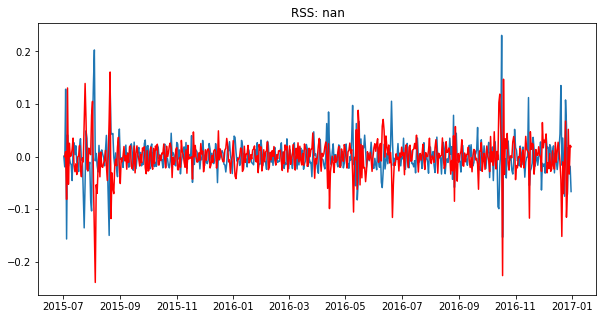




Wikipedia:首页_zh.wikipedia.org_all-access_all-agents


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


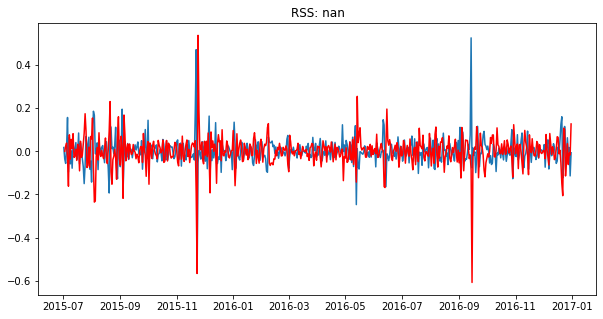




Заглавная_страница_ru.wikipedia.org_all-access_all-agents


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


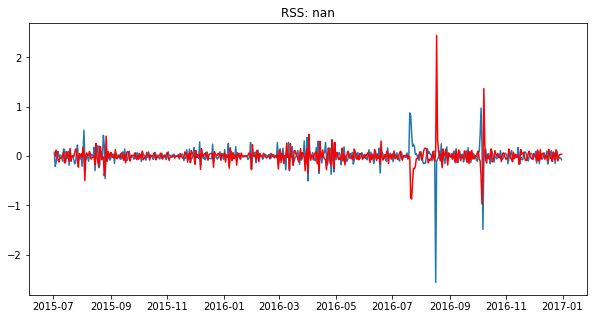




Wikipedia:Portada_es.wikipedia.org_all-access_all-agents


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


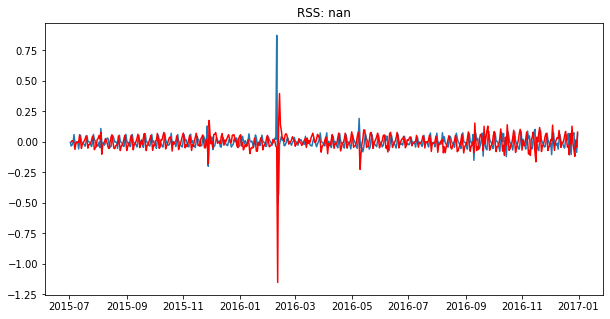

In [0]:
a = 1
for key in top_pages:
    fig = plt.figure(1,figsize=(10,5))
    cols = train.columns
    cols = cols[1:-1]
    data = train.loc[top_pages[key],cols]
    head = train.loc[top_pages[key]]
    print(head[0])
    array=np.column_stack((np.array(train.columns[1:]),np.array(train[train["Page"]==head[0]].iloc[0,1:])))
    main=pd.DataFrame(array)
    main.columns=['day','visitas']
    main = main[:-1]
    main['visitas']=np.float64(main['visitas'])
    from datetime import datetime
    #con = data['Month']
    main['day'] = pd.to_datetime(main['day'])
    main.set_index('day', inplace=True)
    #check datatype of index
    main.index
    serie = main['visitas']
    Dat1_log = np.log(serie)
    Dat1_log_diff_shifting = Dat1_log - Dat1_log.shift()
    Dat1_log_diff_shifting.dropna(inplace=True)
    if(a == 1  or a == 3  or a == 7 or a == 8 or a == 2 ):
      p = 2
      q = 2
      d = 2
      a = a + 1
    elif (a == 4  or a == 5 ):
      p = 4
      q = 4
      d = 2
      a = a + 1
    elif (a == 6 ):
      p = 2
      q = 1
      d = 2
      a = a + 1

    model1 = ARIMA(Dat1_log, order=(p,d,q))
    results_ARIMA1 = model1.fit(disp=-1)
    plt.plot(Dat1_log_diff_shifting)
    plt.plot(results_ARIMA1.fittedvalues, color='red')
    plt.title('RSS: %.4f'%sum((results_ARIMA1.fittedvalues - Dat1_log_diff_shifting)**2))
    print('Plotting AR model')
    
    plt.show()
    
    print('\n\n')

#PREDICCIONES PARA CADA UNA DE LAS SERIES DE TIEMPO

Se realiza la prediccion de cada una de las series despues de aplicar arima para el total de 10 semanas de prediccion

Main_Page_en.wikipedia.org_all-access_all-agents


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


メインページ_ja.wikipedia.org_all-access_all-agents
Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Special:Search_commons.wikimedia.org_all-access_all-agents


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Wikipédia:Accueil_principal_fr.wikipedia.org_all-access_all-agents


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Wikipedia:首页_zh.wikipedia.org_all-access_all-agents
Заглавная_страница_ru.wikipedia.org_all-access_all-agents


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Wikipedia:Portada_es.wikipedia.org_all-access_all-agents


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<Figure size 720x360 with 0 Axes>

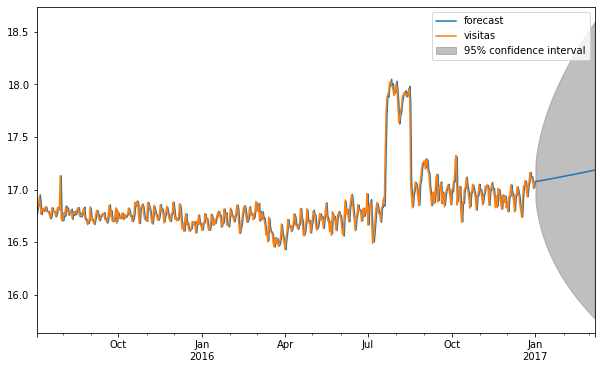

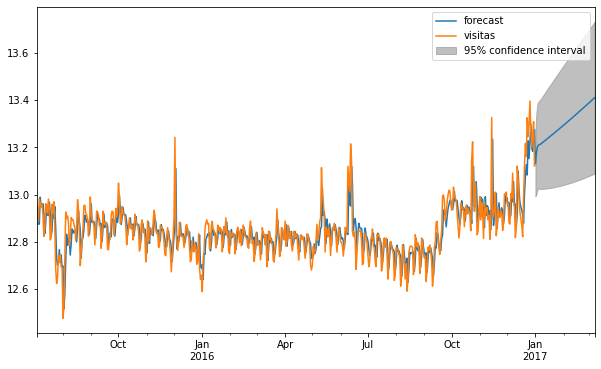

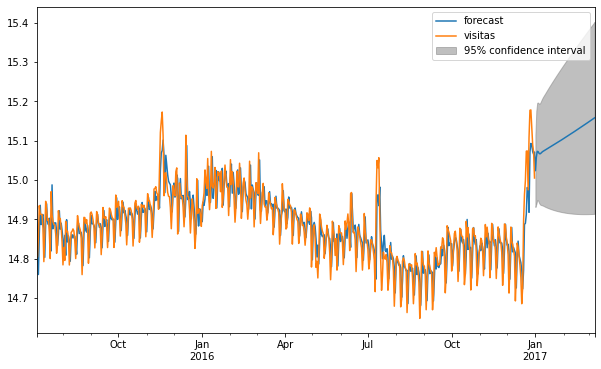

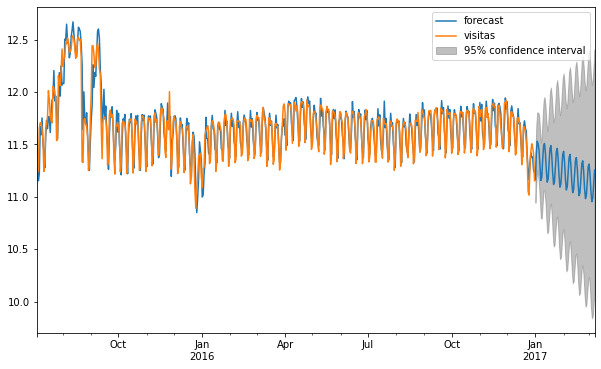

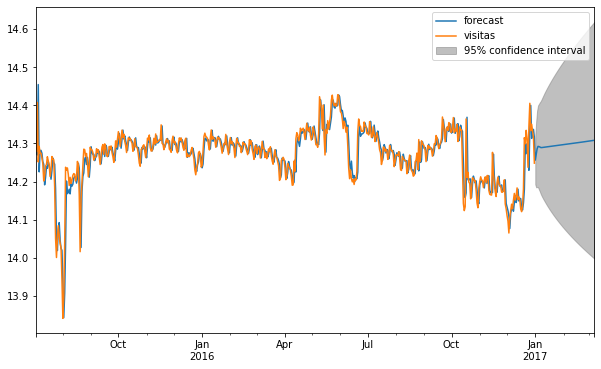

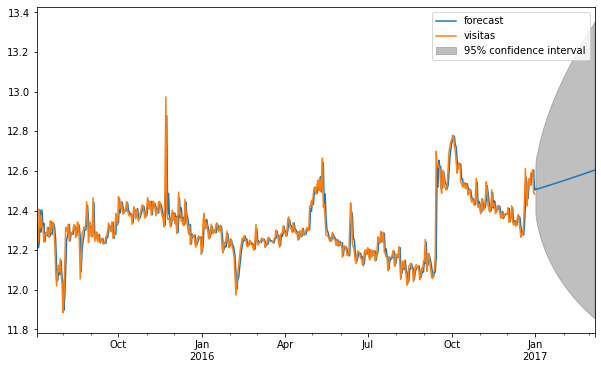

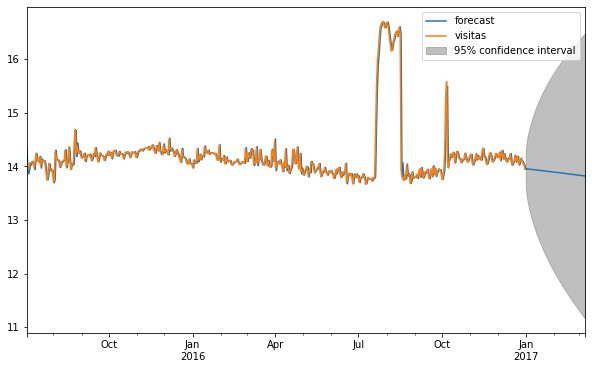

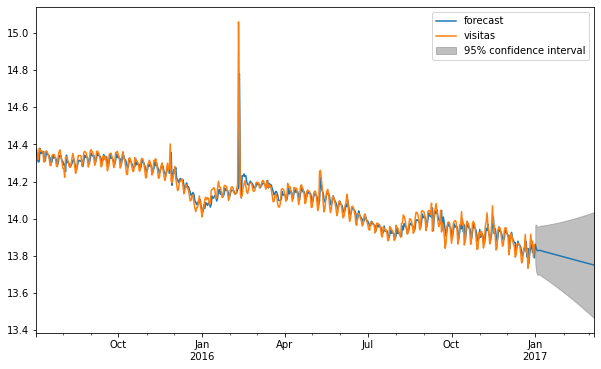

In [0]:
a = 1
for key in top_pages:
    fig = plt.figure(1,figsize=(10,5))
    cols = train.columns
    cols = cols[1:-1]
    data = train.loc[top_pages[key],cols]
    head = train.loc[top_pages[key]]
    print(head[0])
    array=np.column_stack((np.array(train.columns[1:]),np.array(train[train["Page"]==head[0]].iloc[0,1:])))
    main=pd.DataFrame(array)
    main.columns=['day','visitas']
    main = main[:-1]
    main['visitas']=np.float64(main['visitas'])
    from datetime import datetime
    #con = data['Month']
    main['day'] = pd.to_datetime(main['day'])
    main.set_index('day', inplace=True)
    #check datatype of index
    main.index
    serie = main['visitas']
    Dat1_log = np.log(serie)
    Dat1_log_diff_shifting = Dat1_log - Dat1_log.shift()
    Dat1_log_diff_shifting.dropna(inplace=True)
    if(a == 1  or a == 3  or a == 7 or a == 8 or a == 2 ):
      p = 2
      q = 2
      d = 2
      a = a + 1
    elif (a == 4  or a == 5 ):
      p = 4
      q = 4
      d = 2
      a = a + 1
    elif (a == 6 ):
      p = 2
      q = 1
      d = 2
      a = a + 1

    model1 = ARIMA(Dat1_log, order=(p,d,q))
    results_ARIMA1 = model1.fit(disp=-1)
    predictions_ARIMA_diff = pd.Series(results_ARIMA1.fittedvalues, copy=True)
    #print(predictions_ARIMA_diff.head())
    #Convert to cumulative sum
    predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
    #print(predictions_ARIMA_diff_cumsum.head())
    results_ARIMA1.plot_predict(2,615) 

#APLICANDO EL METODO SARIMA

Main_Page_en.wikipedia.org_all-access_all-agents


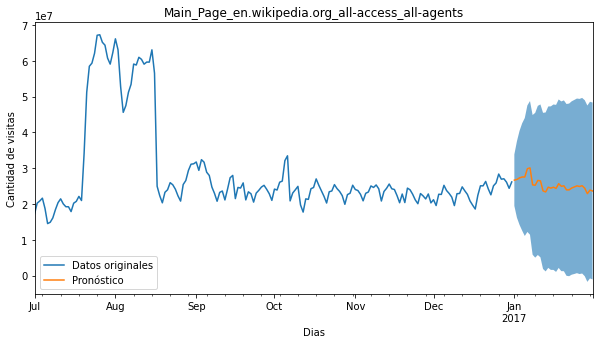

メインページ_ja.wikipedia.org_all-access_all-agents


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12506 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12472 missing from current font.
  font.set_

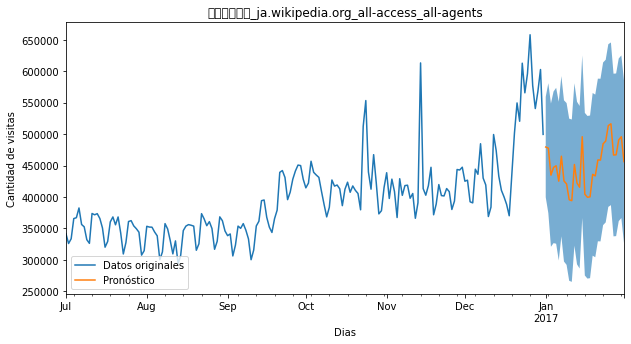

Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents


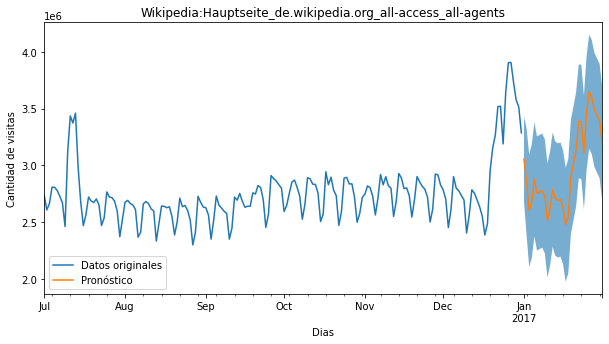

Special:Search_commons.wikimedia.org_all-access_all-agents


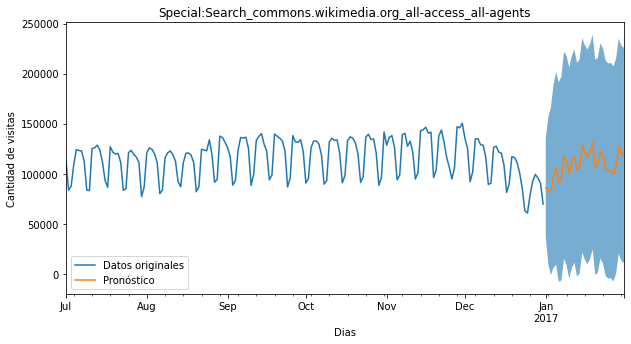

Wikipédia:Accueil_principal_fr.wikipedia.org_all-access_all-agents


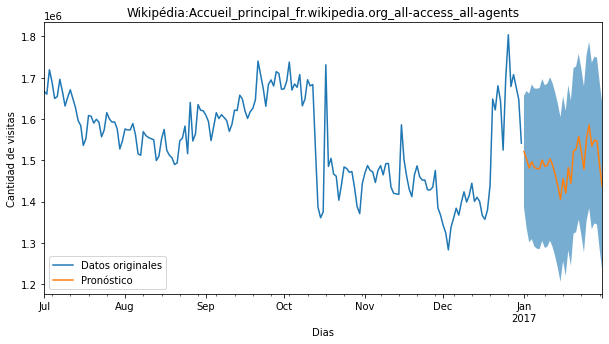

Wikipedia:首页_zh.wikipedia.org_all-access_all-agents


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39318 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 39318 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/

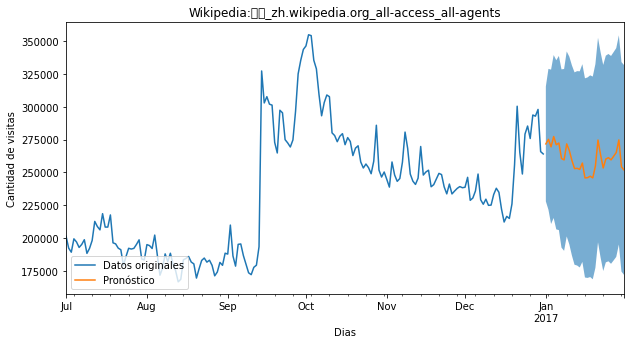

Заглавная_страница_ru.wikipedia.org_all-access_all-agents


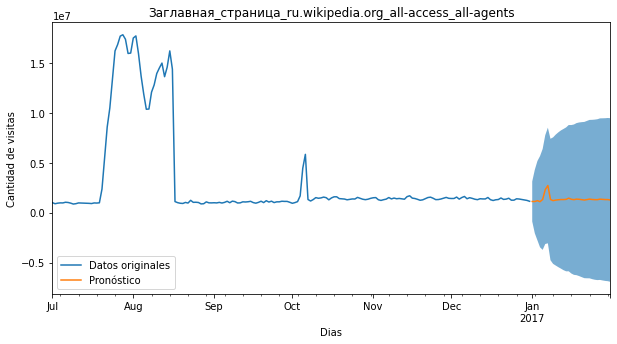

Wikipedia:Portada_es.wikipedia.org_all-access_all-agents


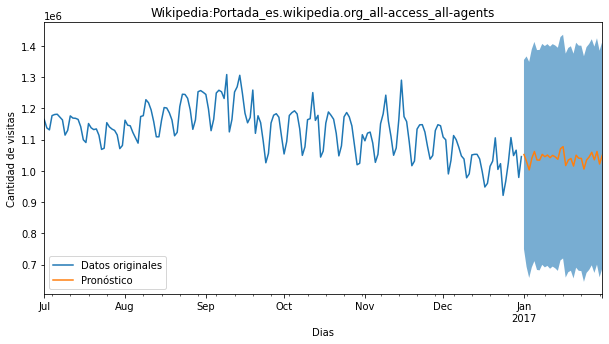

In [0]:
for key in top_pages:
    fig = plt.figure(1,figsize=(10,5))
    cols = train.columns
    cols = cols[1:-1]
    data = train.loc[top_pages[key],cols]
    head = train.loc[top_pages[key]]
    print(head[0])
    array=np.column_stack((np.array(train.columns[1:]),np.array(train[train["Page"]==head[0]].iloc[0,1:])))
    main=pd.DataFrame(array)
    main.columns=['day','visitas']
    main = main[:-1]
    main['visitas']=np.float64(main['visitas'])
    from datetime import datetime
    #con = data['Month']
    main['day'] = pd.to_datetime(main['day'])
    main.set_index('day', inplace=True)
    #check datatype of index
    main.index
    serie = main['visitas']
    Dat1_log = np.log(serie)
    Dat1_log_diff_shifting = Dat1_log - Dat1_log.shift()
    Dat1_log_diff_shifting.dropna(inplace=True)
    from statsmodels.tsa.statespace.sarimax import SARIMAX

    # definir conjunto de datos
    x = serie
    # instanciar modelo
    sarima_model = SARIMAX(x, order=(2,0,1), seasonal_order=(2, 1, 0, 31), freq='D')

    # ajustar modelo
    results = sarima_model.fit()

    # mirar el AIC
    results.aic

    # tomar de datos originales dias 29-oct, 30-oct, y 31-oct
    serie_dias = serie.loc['2016-7-1':'2016-12-31'];
    serie_dias.plot();

    # agregar bandas de confianza
    pred_1_2_conf = results.get_forecast(steps=31).conf_int();
    pred_1_2_conf.index = pd.date_range(start='1/1/2017', end='1/31/2017', freq='D');
    x = pd.date_range(start='1/1/2017', end='1/31/2017', freq='D');
    y1 = pred_1_2_conf['lower visitas'];
    y2 = pred_1_2_conf['upper visitas'];
    plt.fill_between(x, y1, y2, alpha=0.6);

    # predecir para 1-nov y 2-nov
    pred_1_2 = results.get_forecast(steps=31).predicted_mean;
    pred_1_2.index = pd.date_range(start='1/1/2017', end='1/31/2017', freq='D');
    pred_1_2.plot();

    # formato de la grafica final
    plt.title(train.loc[top_pages[key],'Page']);
    plt.ylabel('Cantidad de visitas');
    plt.xlabel('Dias');
    plt.legend(('Datos originales', 'Pronóstico'), loc='lower left');
    plt.savefig('pronostico.png');
    plt.show();

In [0]:
pred_1_2_conf

,lower visitas,upper visitas
2017-01-01,749798.483914,1.354730e+06
2017-01-02,693052.667829,1.365909e+06
2017-01-03,657572.959974,1.348542e+06
2017-01-04,691146.185473,1.388745e+06
2017-01-05,711408.138869,1.412345e+06
2017-01-06,683141.300988,1.386275e+06
2017-01-07,681800.693363,1.386661e+06
2017-01-08,699528.743476,1.405886e+06
2017-01-09,691392.261428,1.399113e+06
2017-01-10,696195.021105,1.405188e+06


## **REDES**

### **Main_Page_en.wikipedia.org_all-access_all-agents**

In [98]:
train[train["Page"]=="Main_Page_en.wikipedia.org_all-access_all-agents"]
train.columns[1:]

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

In [0]:
array=np.column_stack((np.array(train.columns[1:]),np.array(train[train["Page"]=="Main_Page_en.wikipedia.org_all-access_all-agents"].iloc[0,1:])))

In [24]:
main=pd.DataFrame(array)
main.columns=['day','visitas']
main.head()

,day,visitas
0,2015-07-01,2.03812e+07
1,2015-07-02,2.07522e+07
2,2015-07-03,1.9574e+07
3,2015-07-04,2.04396e+07
4,2015-07-05,2.07721e+07


In [29]:
print(main.head())
print('\n Data Types:')
print(main.dtypes)
main = main[:-1]

          day      visitas
0  2015-07-01  2.03812e+07
1  2015-07-02  2.07522e+07
2  2015-07-03   1.9574e+07
3  2015-07-04  2.04396e+07
4  2015-07-05  2.07721e+07

 Data Types:
day        object
visitas    object
dtype: object


In [30]:
main['visitas']=np.float64(main['visitas'])
print(main.dtypes)

day         object
visitas    float64
dtype: object


In [31]:
from datetime import datetime
#con = data['Month']
main['day'] = pd.to_datetime(main['day'])
main.set_index('day', inplace=True)
#check datatype of index
main.index

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='day', length=550, freq=None)

In [32]:
serie = main['visitas']
serie.head(10)

day
2015-07-01    20381245.0
2015-07-02    20752194.0
2015-07-03    19573967.0
2015-07-04    20439645.0
2015-07-05    20772109.0
2015-07-06    22544669.0
2015-07-07    21210887.0
2015-07-08    19107911.0
2015-07-09    19993848.0
2015-07-10    20201821.0
Name: visitas, dtype: float64

In [33]:
print(main.index.min())
print(main.index.max())

2015-07-01 00:00:00
2016-12-31 00:00:00


In [34]:
main.describe()

,visitas
count,5.500000e+02
mean,2.193851e+07
std,9.071410e+06
min,1.365894e+07
25%,1.809851e+07
50%,1.945753e+07
75%,2.221293e+07
max,6.726426e+07


In [36]:
PASOS=7
from sklearn.preprocessing import MinMaxScaler
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = main.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-0.749193,-0.735353,-0.779312,-0.747014,-0.734610,-0.668476,-0.718239,-0.796700
8,-0.735353,-0.779312,-0.747014,-0.734610,-0.668476,-0.718239,-0.796700,-0.763646
9,-0.779312,-0.747014,-0.734610,-0.668476,-0.718239,-0.796700,-0.763646,-0.755887
10,-0.747014,-0.734610,-0.668476,-0.718239,-0.796700,-0.763646,-0.755887,-0.774691
11,-0.734610,-0.668476,-0.718239,-0.796700,-0.763646,-0.755887,-0.774691,-0.754738


In [60]:
# split into train and test sets
values = reframed.values
n_train_days = 315+150 - (30+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(428, 1, 7) (428,) (115, 1, 7) (115,)


In [0]:
def crear_modeloFF():
    from tensorflow.python.keras.layers import Dense,Activation, Flatten
    from tensorflow.python.keras import Sequential
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model


In [78]:
EPOCHS=70

model = crear_modeloFF()

history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1, 7)              56        
_________________________________________________________________
flatten_2 (Flatten)          (None, 7)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
62/62 [==============================] - 0s 3ms/step - loss: 0.0729 - mse: 0.0225 - val_loss: 0.1111 - val_mse: 0.0178
Epoch 2/70
62/62 [==============================] - 0s 2ms/step - loss: 0.0689 - mse: 0.0211 - val_loss: 0.1028 - val_mse: 0.0154
Epoch 3/70
62/62 [==============================] - 0s 2ms/step - loss: 0.0677 - mse: 0.0201 - val_loss: 0.1117 - val_mse: 0.017

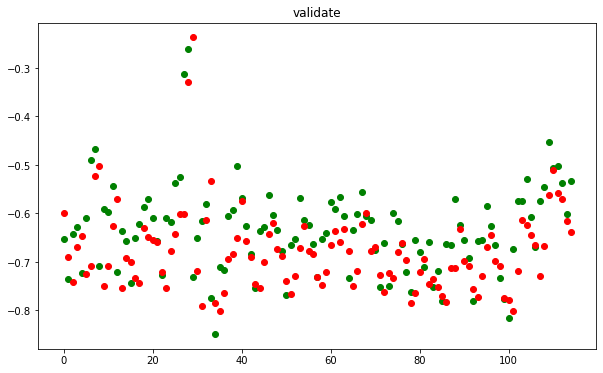

In [79]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

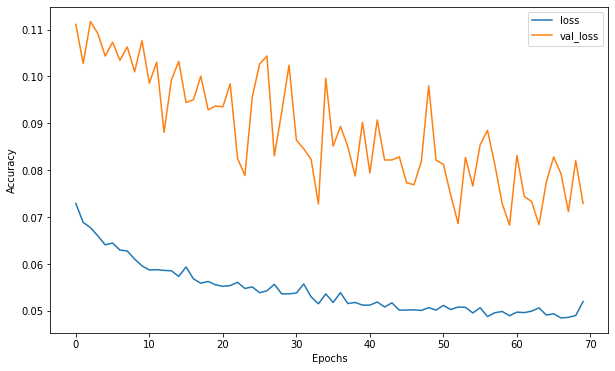

In [80]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [83]:
ultimosDias = main['2016-12-01 00:00:00':'2016-12-31 00:00:00']
ultimosDias

,visitas
day,
2016-12-01,21174392.0
2016-12-02,19551058.0
2016-12-03,22703751.0
2016-12-04,22657555.0
2016-12-05,25201283.0
2016-12-06,23745159.0
2016-12-07,22923017.0
2016-12-08,21902049.0
2016-12-09,19534309.0


In [84]:
values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-0.467543,-0.799874,-0.154450,-0.163908,0.356847,0.058748,-0.109562
8,-0.799874,-0.154450,-0.163908,0.356847,0.058748,-0.109562,-0.318576
9,-0.154450,-0.163908,0.356847,0.058748,-0.109562,-0.318576,-0.803303
10,-0.163908,0.356847,0.058748,-0.109562,-0.318576,-0.803303,-0.123485
11,0.356847,0.058748,-0.109562,-0.318576,-0.803303,-0.123485,-0.108369
12,0.058748,-0.109562,-0.318576,-0.803303,-0.123485,-0.108369,0.267571
13,-0.109562,-0.318576,-0.803303,-0.123485,-0.108369,0.267571,0.041577


In [85]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[-0.1095624 , -0.31857634, -0.80330324, -0.12348509,
         -0.10836935,  0.26757145,  0.04157734]],

       [[-0.31857634, -0.80330324, -0.12348509, -0.10836935,
          0.26757145,  0.04157734, -0.1634264 ]],

       [[-0.80330324, -0.12348509, -0.10836935,  0.26757145,
          0.04157734, -0.1634264 , -0.5371909 ]],

       [[-0.12348509, -0.10836935,  0.26757145,  0.04157734,
         -0.1634264 , -0.5371909 , -0.7788768 ]],

       [[-0.10836935,  0.26757145,  0.04157734, -0.1634264 ,
         -0.5371909 , -0.7788768 , -1.0000002 ]],

       [[ 0.26757145,  0.04157734, -0.1634264 , -0.5371909 ,
         -0.7788768 , -1.0000002 , -0.21175861]],

       [[ 0.04157734, -0.1634264 , -0.5371909 , -0.7788768 ,
         -1.0000002 , -0.21175861,  0.32940483]],

       [[-0.1634264 , -0.5371909 , -0.7788768 , -1.0000002 ,
         -0.21175861,  0.32940483,  0.3247018 ]],

       [[-0.5371909 , -0.7788768 , -1.0000002 , -0.21175861,
          0.32940483,  0.3247018 ,  0.57846

In [86]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test

results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[-0.1095624  -0.31857634 -0.80330324 -0.12348509 -0.10836935
    0.26757145  0.04157734]]

 [[-0.31857634 -0.80330324 -0.12348509 -0.10836935  0.26757145
    0.04157734 -0.1634264 ]]

 [[-0.80330324 -0.12348509 -0.10836935  0.26757145  0.04157734
   -0.1634264  -0.5371909 ]]

 [[-0.12348509 -0.10836935  0.26757145  0.04157734 -0.1634264
   -0.5371909  -0.7788768 ]]

 [[-0.10836935  0.26757145  0.04157734 -0.1634264  -0.5371909
   -0.7788768  -1.0000002 ]]

 [[ 0.26757145  0.04157734 -0.1634264  -0.5371909  -0.7788768
   -1.0000002  -0.21175861]]

 [[ 0.04157734 -0.1634264  -0.5371909  -0.7788768  -1.0000002
   -0.21175861  0.32940483]]

 [[-0.1634264  -0.5371909  -0.7788768  -1.0000002  -0.21175861
    0.32940483  0.3247018 ]]

 [[-0.5371909  -0.7788768  -1.0000002  -0.21175861  0.32940483
    0.3247018   0.5784688 ]]

 [[-0.7788768  -1.0000002  -0.21175861  0.32940483  0.3247018
    0.5784688   0.15208435]]

 [[-1.0000002  -0.21175861  0.32940483  0.3247018   0.5784688
    0.1520843

In [87]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[24362609.95672964],
       [25692412.52332823],
       [26463013.44940809],
       [27454743.24574212],
       [27532428.816331  ],
       [27407342.24580848],
       [27355627.85561885]])

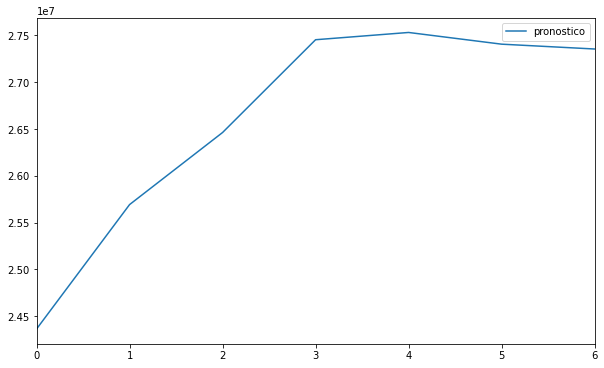

In [88]:
prediccion1SemanaDiciembre = pd.DataFrame(inverted)
prediccion1SemanaDiciembre.columns = ['pronostico']
prediccion1SemanaDiciembre.plot()
prediccion1SemanaDiciembre.to_csv('pronostico.csv')

### **メインページ_ja.wikipedia.org_all-access_all-agents**

In [99]:
train[train["Page"]=="メインページ_ja.wikipedia.org_all-access_all-agents"]
train.columns[1:]

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

In [0]:
array=np.column_stack((np.array(train.columns[1:]),np.array(train[train["Page"]=="メインページ_ja.wikipedia.org_all-access_all-agents"].iloc[0,1:])))

In [102]:
main=pd.DataFrame(array)
main.columns=['day','visitas']
main.head()

,day,visitas
0,2015-07-01,418594
1,2015-07-02,415069
2,2015-07-03,419023
3,2015-07-04,398771
4,2015-07-05,394907


In [103]:
print(main.head())
print('\n Data Types:')
print(main.dtypes)
main = main[:-1]

          day visitas
0  2015-07-01  418594
1  2015-07-02  415069
2  2015-07-03  419023
3  2015-07-04  398771
4  2015-07-05  394907

 Data Types:
day        object
visitas    object
dtype: object


In [104]:
main['visitas']=np.float64(main['visitas'])
print(main.dtypes)

day         object
visitas    float64
dtype: object


In [105]:
from datetime import datetime
#con = data['Month']
main['day'] = pd.to_datetime(main['day'])
main.set_index('day', inplace=True)
#check datatype of index
main.index

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10',
               ...
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-24',
               '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='day', length=549, freq=None)

In [106]:
serie = main['visitas']
serie.head(10)

day
2015-07-01    418594.0
2015-07-02    415069.0
2015-07-03    419023.0
2015-07-04    398771.0
2015-07-05    394907.0
2015-07-06    434303.0
2015-07-07    428343.0
2015-07-08    420964.0
2015-07-09    424638.0
2015-07-10    406848.0
Name: visitas, dtype: float64

In [107]:
print(main.index.min())
print(main.index.max())

2015-07-01 00:00:00
2016-12-30 00:00:00


In [108]:
main.describe()

,visitas
count,549.000000
mean,382976.737705
std,47466.795715
min,262005.000000
25%,355572.000000
50%,375929.000000
75%,401010.000000
max,657977.000000


In [109]:
PASOS=7
from sklearn.preprocessing import MinMaxScaler
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = main.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-0.209091,-0.226895,-0.206924,-0.309214,-0.328730,-0.129747,-0.159850,-0.197120
8,-0.226895,-0.206924,-0.309214,-0.328730,-0.129747,-0.159850,-0.197120,-0.178563
9,-0.206924,-0.309214,-0.328730,-0.129747,-0.159850,-0.197120,-0.178563,-0.268418
10,-0.309214,-0.328730,-0.129747,-0.159850,-0.197120,-0.178563,-0.268418,-0.451239
11,-0.328730,-0.129747,-0.159850,-0.197120,-0.178563,-0.268418,-0.451239,-0.385042


In [110]:
# split into train and test sets
values = reframed.values
n_train_days = 315+150 - (30+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(428, 1, 7) (428,) (114, 1, 7) (114,)


In [0]:
def crear_modeloFF():
    from tensorflow.python.keras.layers import Dense,Activation, Flatten
    from tensorflow.python.keras import Sequential
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model


In [112]:
EPOCHS=70

model = crear_modeloFF()

history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1, 7)              56        
_________________________________________________________________
flatten_3 (Flatten)          (None, 7)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
62/62 [==============================] - 0s 3ms/step - loss: 0.7623 - mse: 0.6945 - val_loss: 0.3065 - val_mse: 0.1680
Epoch 2/70
62/62 [==============================] - 0s 2ms/step - loss: 0.1449 - mse: 0.0413 - val_loss: 0.3221 - val_mse: 0.1737
Epoch 3/70
62/62 [==============================] - 0s 2ms/step - loss: 0.1197 - mse: 0.0307 - val_loss: 0.3072 - val_mse: 0.162

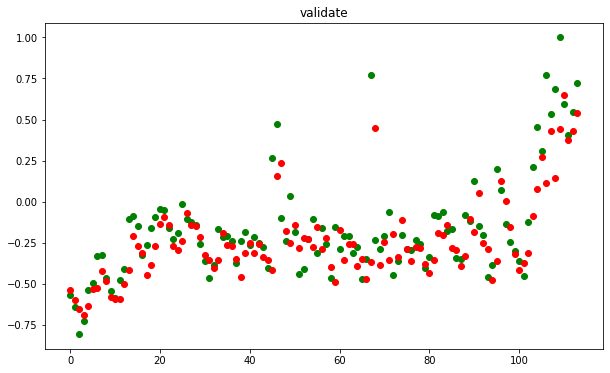

In [113]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

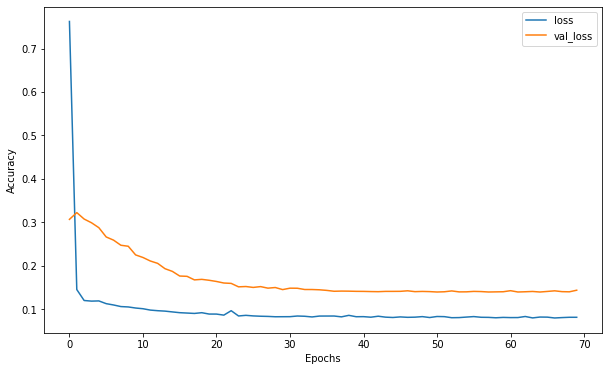

In [114]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [115]:
ultimosDias = main['2016-12-01 00:00:00':'2016-12-31 00:00:00']
ultimosDias

,visitas
day,
2016-12-01,425100.0
2016-12-02,426752.0
2016-12-03,392355.0
2016-12-04,390668.0
2016-12-05,444252.0
2016-12-06,436116.0
2016-12-07,484713.0
2016-12-08,430085.0
2016-12-09,419206.0


In [116]:
values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-0.611438,-0.600007,-0.838024,-0.849697,-0.478912,-0.535211,-0.198935
8,-0.600007,-0.838024,-0.849697,-0.478912,-0.535211,-0.198935,-0.576944
9,-0.838024,-0.849697,-0.478912,-0.535211,-0.198935,-0.576944,-0.652223
10,-0.849697,-0.478912,-0.535211,-0.198935,-0.576944,-0.652223,-1.000000
11,-0.478912,-0.535211,-0.198935,-0.576944,-0.652223,-1.000000,-0.896786
12,-0.535211,-0.198935,-0.576944,-0.652223,-1.000000,-0.896786,-0.097630
13,-0.198935,-0.576944,-0.652223,-1.000000,-0.896786,-0.097630,-0.273826


In [117]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[-0.19893456, -0.57694364, -0.6522231 , -1.        ,
         -0.896786  , -0.09763002, -0.27382636]],

       [[-0.57694364, -0.6522231 , -1.        , -0.896786  ,
         -0.09763002, -0.27382636, -0.55614996]],

       [[-0.6522231 , -1.        , -0.896786  , -0.09763002,
         -0.27382636, -0.55614996, -0.71134496]],

       [[-1.        , -0.896786  , -0.09763002, -0.27382636,
         -0.55614996, -0.71134496, -0.7829983 ]],

       [[-0.896786  , -0.09763002, -0.27382636, -0.55614996,
         -0.71134496, -0.7829983 , -0.866277  ]],

       [[-0.09763002, -0.27382636, -0.55614996, -0.71134496,
         -0.7829983 , -0.866277  , -0.9914751 ]],

       [[-0.27382636, -0.55614996, -0.71134496, -0.7829983 ,
         -0.866277  , -0.9914751 , -0.53649807]],

       [[-0.55614996, -0.71134496, -0.7829983 , -0.866277  ,
         -0.9914751 , -0.53649807, -0.0845449 ]],

       [[-0.71134496, -0.7829983 , -0.866277  , -0.9914751 ,
         -0.53649807, -0.0845449 ,  0.24991

In [118]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test

results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[-0.19893456 -0.57694364 -0.6522231  -1.         -0.896786
   -0.09763002 -0.27382636]]

 [[-0.57694364 -0.6522231  -1.         -0.896786   -0.09763002
   -0.27382636 -0.55614996]]

 [[-0.6522231  -1.         -0.896786   -0.09763002 -0.27382636
   -0.55614996 -0.71134496]]

 [[-1.         -0.896786   -0.09763002 -0.27382636 -0.55614996
   -0.71134496 -0.7829983 ]]

 [[-0.896786   -0.09763002 -0.27382636 -0.55614996 -0.71134496
   -0.7829983  -0.866277  ]]

 [[-0.09763002 -0.27382636 -0.55614996 -0.71134496 -0.7829983
   -0.866277   -0.9914751 ]]

 [[-0.27382636 -0.55614996 -0.71134496 -0.7829983  -0.866277
   -0.9914751  -0.53649807]]

 [[-0.55614996 -0.71134496 -0.7829983  -0.866277   -0.9914751
   -0.53649807 -0.0845449 ]]

 [[-0.71134496 -0.7829983  -0.866277   -0.9914751  -0.53649807
   -0.0845449   0.24991179]]

 [[-0.7829983  -0.866277   -0.9914751  -0.53649807 -0.0845449
    0.24991179  0.04815412]]

 [[-0.866277   -0.9914751  -0.53649807 -0.0845449   0.24991179
    0.04815412

In [119]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[458458.47732716],
       [451314.70690735],
       [435864.622129  ],
       [421184.00932878],
       [422958.0832416 ],
       [442770.53202856],
       [447885.75636855]])

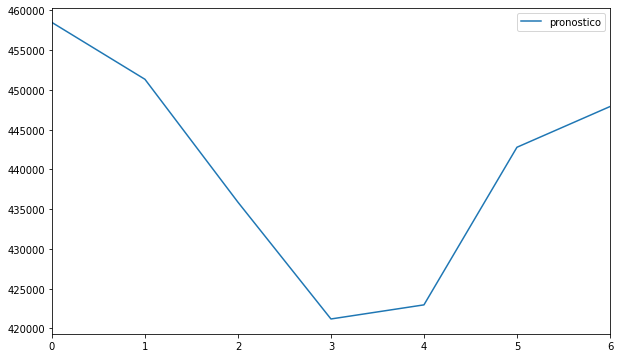

In [120]:
prediccion1SemanaDiciembre = pd.DataFrame(inverted)
prediccion1SemanaDiciembre.columns = ['pronostico']
prediccion1SemanaDiciembre.plot()
prediccion1SemanaDiciembre.to_csv('pronostico.csv')

#CONCLUSIONES 




*   ..
*   ..

